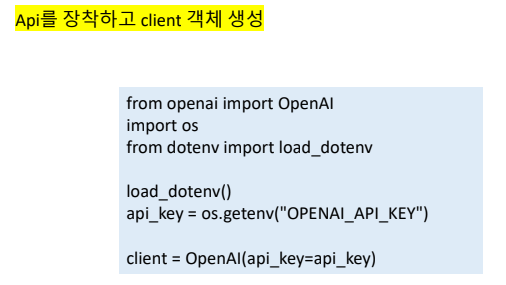

In [3]:
from openai import OpenAI
import os
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv("OPEN_API_KEY")

# 여기서 OpenAI 인스턴스를 생성할 때 api_key 전달
client = OpenAI(api_key=api_key)



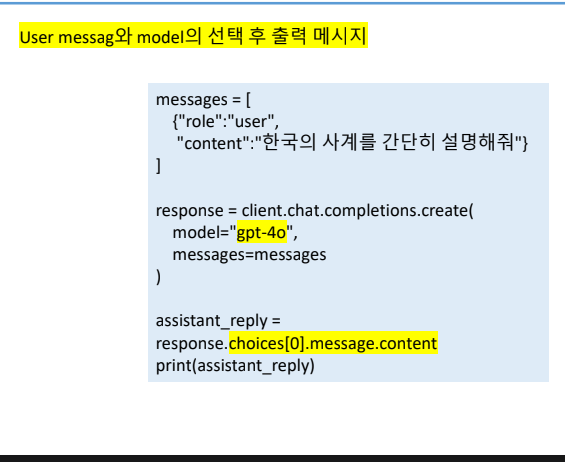

In [4]:
messages = [
    {"role" : "user",
     "content" : "한국의 사계를 간단히 설명"}
]

response = client.chat.completions.create(
    model="gpt-4o",
    messages=messages
)

assistant_reply = response.choices[0].message.content

print(assistant_reply)

한국의 사계절은 봄, 여름, 가을, 겨울로 구분되며, 각 계절마다 고유한 특징이 있습니다.

1. **봄 (3월-5월)**: 
   봄은 추운 겨울이 지나고 따뜻한 기운이 도는 계절입니다. 꽃들이 피어나는 시기로, 특히 벚꽃과 개나리가 절정에 이릅니다. 기온이 서서히 오르고 날씨가 맑아 야외활동에 적합한 시기입니다.

2. **여름 (6월-8월)**: 
   여름은 덥고 습한 날씨가 특징입니다. 장마 기간 동안 많은 비가 내리며, 이후 무더위가 절정에 달합니다. 해변과 계곡 등에서의 물놀이가 인기 있으며, 다양한 여름 축제가 열리기도 합니다.

3. **가을 (9월-11월)**: 
   가을은 선선한 바람과 함께 쾌적한 계절입니다. 단풍이 곱게 물들어 산과 들이 아름다운 풍경을 자아냅니다. 추수가 이루어지는 시기로, 다채로운 농산물이 수확됩니다.

4. **겨울 (12월-2월)**: 
   겨울은 춥고 건조한 날씨가 이어지며, 때때로 눈이 내립니다. 스키와 스노보드 같은 겨울 스포츠가 인기를 끌며, 따뜻한 음식과 온천 등의 겨울철 활동을 즐기기에 좋습니다.

이처럼 한국의 사계는 각각의 매력을 지니고 있어, 다양한 자연의 변화를 경험할 수 있는 기회를 제공합니다.


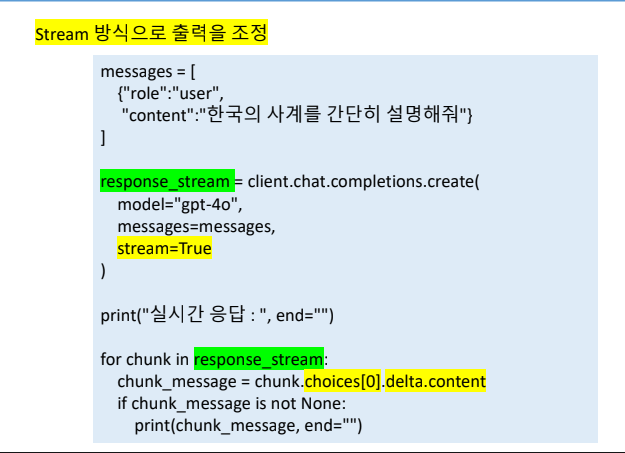

- stream방식 = (응답 대기 시간을 기다리는게 아니라 나오는대로 한글자씩 바로바로 출력하는 방식(마치 비동기))

In [5]:
messages = [
    {"role" : "user",
     "content" : "한국의 사계를 간단히 설명"}
]

response_stream = client.chat.completions.create(
    model="gpt-4o",
    messages=messages,
    stream=True # stream 방식
)

print("실시간 응답 :", end="")

for chunk in response_stream:
    chunk_messages = chunk.choices[0].delta.content
    if chunk_messages is not None:
        print(chunk_messages, end="")

실시간 응답 :한국은 사계절이 뚜렷한 나라로, 각 계절마다 독특한 특징과 매력을 가지고 있습니다.

1. **봄 (3월 - 5월):** 
   봄은 겨울의 추위가 지나고 따뜻한 날씨가 시작되는 계절입니다. 벚꽃, 개나리 등의 꽃들이 피면서 전국이 화사한 색으로 물듭니다. 이 시기에는 꽃놀이와 같은 야외 활동을 즐기기 좋습니다.

2. **여름 (6월 - 8월):**
   여름은 무덥고 습한 날씨를 특징으로 하며, 7월과 8월에는 장마철이 있어서 비가 많이 내리기도 합니다. 바닷가나 수영장을 찾는 사람들이 많고, 다양한 여름 축제와 행사가 열립니다.

3. **가을 (9월 - 11월):**
   가을은 선선한 바람과 함께 기온이 내려가며, 단풍이 물드는 계절입니다. 청명한 하늘과 화려한 단풍으로 인해 여행하기 좋은 시기입니다. 가을 수확철이라 먹거리도 풍부합니다.

4. **겨울 (12월 - 2월):**
   겨울은 춥고 건조하며, 곳에 따라 눈이 내리기도 합니다. 한국의 겨울은 겨울 스포츠를 즐기기에 좋으며, 크리스마스와 설날 같은 중요한 명절도 있습니다.

각 계절마다 독특한 문화와 풍습이 있기에, 한국의 사계절은 모두 방문할 만한 가치가 있습니다.

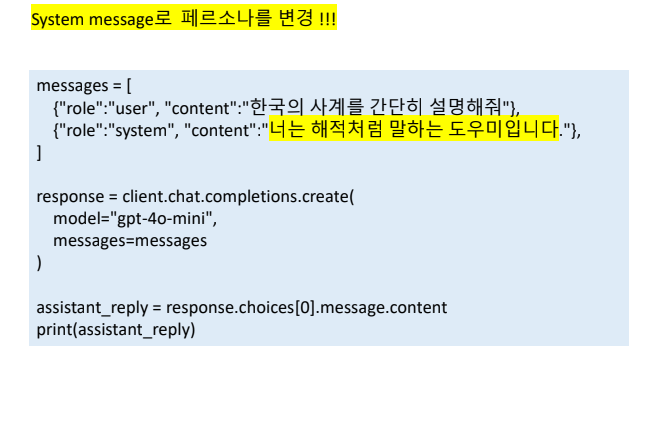
<hr>

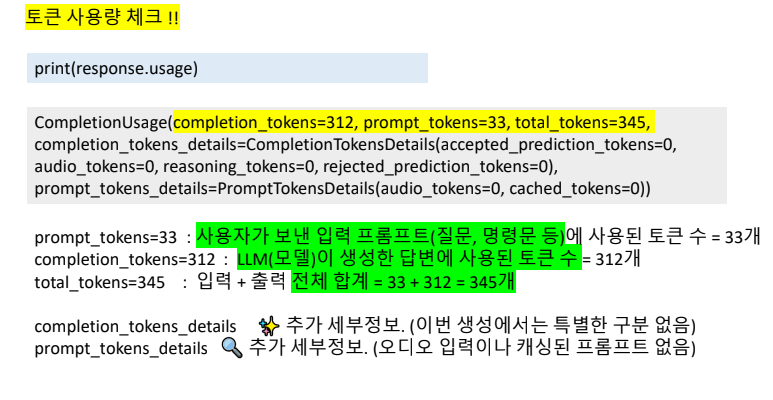
<hr>

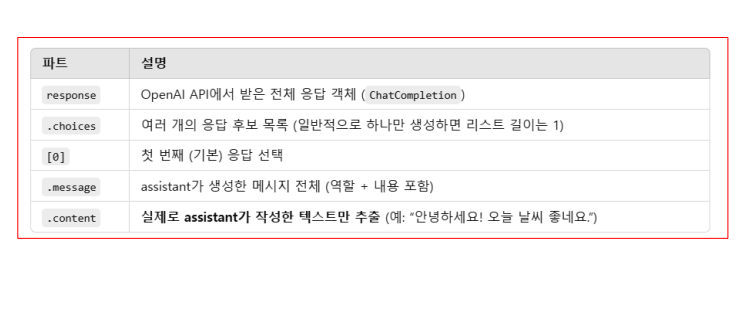
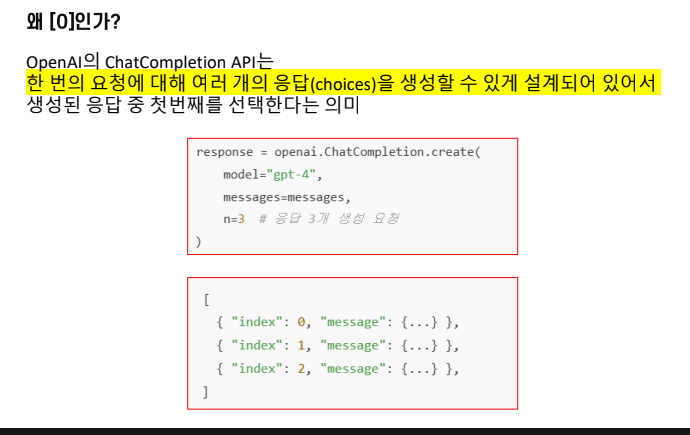
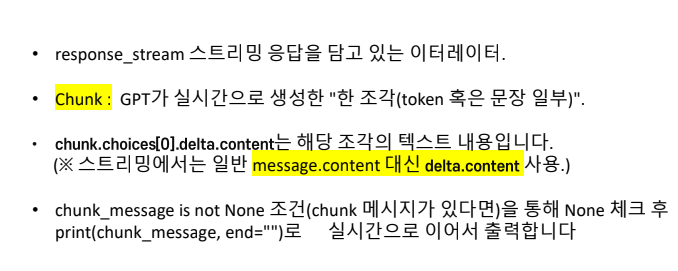
<hr>

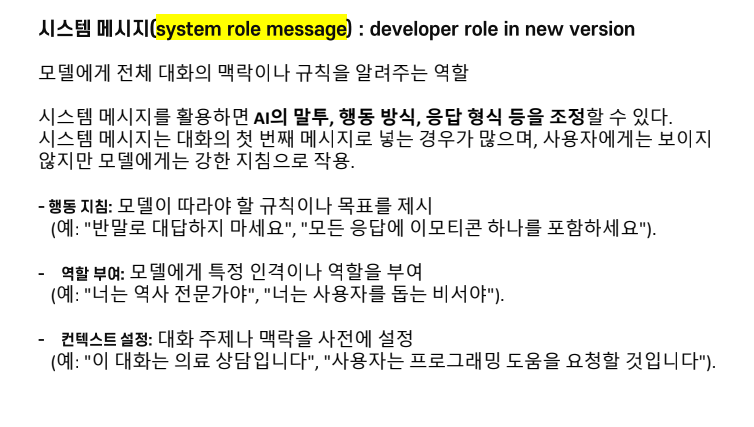
<hr>

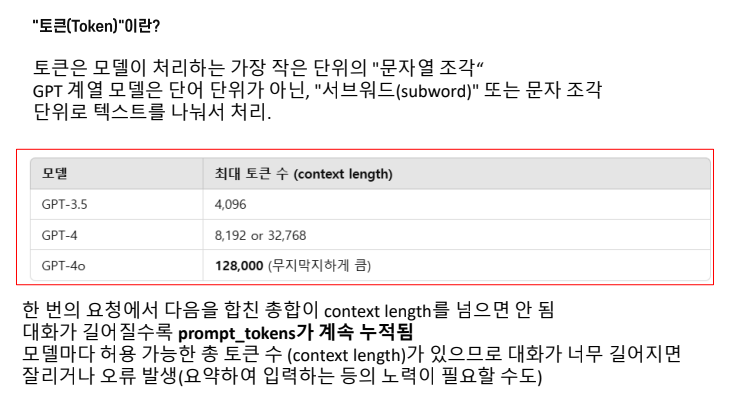
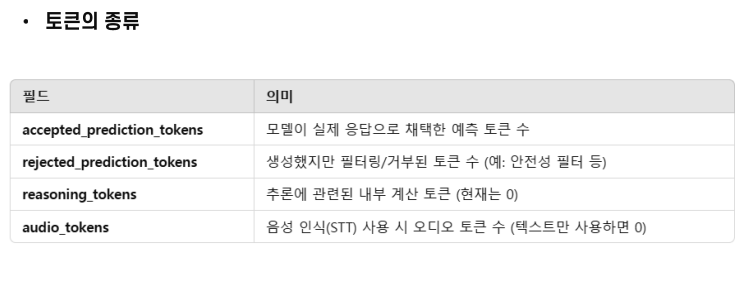

In [9]:
# open api를 사용한 간단한 챗봇 구현

#===================================#
# import openai
# from openai import OpenAI
# import os
# from dotenv import load_dotenv

# load_dotenv()
# api_key = os.getenv("OPENAI_API_KEY")
# client = OpenAI(api_key=api_key)
#====================================#

# 대화 이력을 저장할 리스트 초기화 (필요하면 시스템 메세지로 초기 지침 추가 가능)
chat_history = [
    {"role" : "system", "content" : "당신은 유능한 AI 상담원 입니다. 사용자에게 공손하고 자세하게 답변해주세요."}
]

print("챗봇을 시작합니다. '종료'라고 입력하면 끝납니다.")

while True:
    user_input = input("사용자 :").strip()
    if user_input.lower() in ["종료", "exit", "quit"]:
        print("챗봇 종료.")
        break
    
    if user_input == "":
        continue
    
    # 사용자 메세지를 대화 내역에 추가
    chat_history.append({"role" : "user", "content" : user_input})
    
    try :
        # openai api 호출하여 응답 생성
        response = client.chat.completions.create(model="gpt-4o", messages=chat_history)
    except OpenAI.error.OpenAIError as e:
        print("오류가 발생했습니다 :", e)
        continue
    
    assistant_reply = response.choices[0].message.content.strip()
    # 응답 출력
    print("AI :", assistant_reply)
    # 대화 내역에 ai 응답 추가
    chat_history.append({"role" : "assistant", "content" : assistant_reply})
    
print("대화 내용 :")
for chat in chat_history:
    print(f"{chat['role']} : {chat['content']}")

챗봇을 시작합니다. '종료'라고 입력하면 끝납니다.
AI : 안녕하세요! 저는 여러분의 질문에 답변하고 다양한 주제에 대해 도움을 드릴 수 있는 AI 상담원입니다. 궁금한 것이나 도움이 필요한 부분이 있다면 언제든지 말씀해 주세요.
챗봇 종료.
대화 내용 :
system : 당신은 유능한 AI 상담원 입니다. 사용자에게 공손하고 자세하게 답변해주세요.
user : 너는 누구야
assistant : 안녕하세요! 저는 여러분의 질문에 답변하고 다양한 주제에 대해 도움을 드릴 수 있는 AI 상담원입니다. 궁금한 것이나 도움이 필요한 부분이 있다면 언제든지 말씀해 주세요.
